In [9]:
import os
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [4]:
BASE_PATH = r'data/coordinates'
CITIES = dict(rio='Rio', sao_paulo='SP')
shortname = {'Rio':'rio', 'sao_paulo':'sp'}

## Rio test data

In [6]:
dd = pd.read_csv(f'{BASE_PATH}/coordinates_rio_test.csv')
dd

,order_id,order_estimated_delivery_date,day,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,y,x,Linf_from_center,volume_raw,volume_clipped
0,9a327776c4009cd0980497d9386b1472,2018-05-02 00:00:00,441.0,af3bbdd63bf976839718d59fd60ba9f1,20031.0,rio de janeiro,RJ,-22.909426,-43.176131,-120.819081,2077.179232,2077.179232,7.680,7.680
1,4bcc4496263c85f3a25598290559c9d9,2018-05-02 00:00:00,441.0,20db7b93bdff3c98f343fa5bd139f85f,21380.0,rio de janeiro,RJ,-22.885375,-43.321912,2538.606320,-12871.243568,12871.243568,8.000,8.000
2,17a57b9f3ed8c82e3714464f9fdab931,2018-05-02 00:00:00,441.0,dcdeca2dac1535bd18347ca0f596865a,26250.0,nova iguacu,RJ,-22.769376,-43.441595,15365.042336,-25143.514389,25143.514389,27.520,27.520
3,8c6a3fab1ed272b02f23bb7dc9061d9a,2018-05-02 00:00:00,441.0,9084b0a94916b534ac6e626011092567,24220.0,niteroi,RJ,-22.904001,-43.108217,478.954427,9041.090361,9041.090361,3.120,3.120
4,b3b4094d535004ba0ef19c96ba6dfd11,2018-05-02 00:00:00,441.0,7fab87c1778bff3566834e0a48fff0b9,21830.0,rio de janeiro,RJ,-22.877271,-43.477463,3434.604262,-28821.409533,28821.409533,6.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,f66ab2fcf6eb4fbb8c027f16de902cdc,2018-08-09 00:00:00,540.0,90ab1a5224e5e1999b34c85f637a7491,22440.0,rio de janeiro,RJ,-22.982483,-43.218892,-8199.085393,-2307.539444,8199.085393,5.292,5.292
2010,561a3b9c8e282502bd86b6504b17544b,2018-08-09 00:00:00,540.0,1d61cc31551519c757aacc3c90629167,25020.0,duque de caxias,RJ,-22.780278,-43.313650,14159.552121,-12024.089223,14159.552121,7.800,7.800
2011,3d352a1e37d7eabd08d9104244fa0e21,2018-08-09 00:00:00,540.0,7012918b3e6f74df5ac98f8eb735b12b,22061.0,rio de janeiro,RJ,-22.975726,-43.188783,-7451.868744,779.770057,7451.868744,3.600,3.600
2012,731eb375d1d241e31221637ee6e5ef56,2018-08-09 00:00:00,540.0,1b0424078235e67294af80419dfab134,22231.0,rio de janeiro,RJ,-22.934047,-43.178416,-2843.298946,1842.805986,2843.298946,7.392,7.392


### Demands

count    2014.000000
mean       15.383695
std        20.683785
min         0.352000
25%         2.880000
50%         6.930000
75%        19.375000
max       100.000000
Name: volume_clipped, dtype: float64


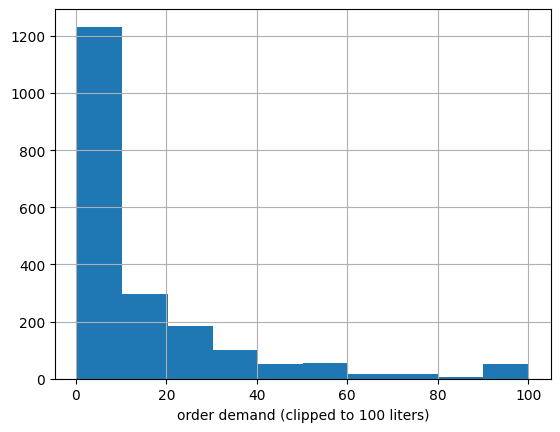

In [25]:
print(dd.volume_clipped.describe())
dd.volume_clipped.hist()
plt.xlabel('order demand (clipped to 100 liters)');

### Locations

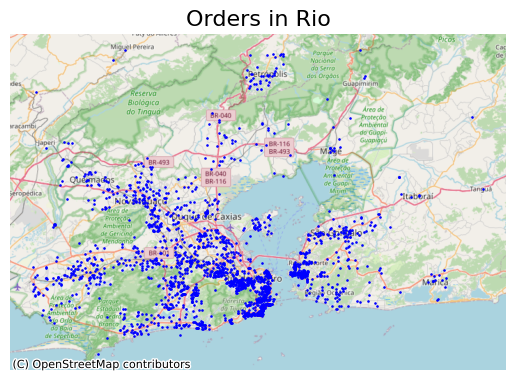

In [18]:
geometry = [Point(lon, lat) for lon, lat in zip(dd.geolocation_lng.values, dd.geolocation_lat.values)]
geo_df = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
geo_df = geo_df.to_crs(epsg=3857)
ax = geo_df.plot(marker='.', markersize=3, color='blue')  # , label='buyers')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis('off')
ax.set_title('Orders in Rio', fontsize=16);